## Cyberbullying Detection: A Machine Learning Approach

In [1]:
#imports

import pandas as pd 
import nltk
import re
import matplotlib.pyplot as plt

### Step 1: Load the Dataset 

In [2]:
df = pd.read_csv("cyberbullying_tweets.csv")

### Visualize the data

In [3]:
#to set the column width to maximum 
pd.set_option('display.max_colwidth',150)

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


In [4]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this glo...",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK KP that dumb nigger bitch lmao,ethnicity


In [5]:
# drop the cyberbullying_type column 

df.drop(["cyberbullying_type"], axis = 1, inplace = True)
df.head()

,tweet_text
0,"In other words #katandandre, your food was crapilicious! #mkr"
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter."
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies."


In [6]:
#check for missing values in data

df.isna().sum()

tweet_text    0
dtype: int64

### Step 2 : Data Preprocessing 

In [7]:
#to convert uppercase to lowercase characters
def lower_word(t):
    new_text = "".join(t.lower())
    return new_text

df['lowercased'] = df['tweet_text'].apply(lambda x: lower_word(x))
df.head()

,tweet_text,lowercased
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr"
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter."
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies."


In [8]:
#remove usernames, url and non utf8/ascii characters 
def rem_url(t):
    text1 = "".join(re.sub(r'(?:\@|https?\://)\S+', '', t))
    text = "".join(re.sub(r'[^\x00-\x7f]',r'', text1))
    return text

df['no_url_and_username'] = df['lowercased'].apply(lambda x: rem_url(x))
df.head()

,tweet_text,lowercased,no_url_and_username
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr"
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter."
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies."


In [9]:
#to remove punctuation 
def rem_punc(t):
        new_text = "".join(re.sub(r'[^\w\s]', '', t))
        return new_text

df['no_punctuation'] = df['no_url_and_username'].apply(lambda x: rem_punc(x))
df.head()

,tweet_text,lowercased,no_url_and_username,no_punctuation
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr",in other words katandandre your food was crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks for the heads up but not too concerned about another angry dude on twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.",this is an isis account pretending to be a kurdish account like islam it is all lies


In [10]:
#to break the sentence into tokens
from nltk.tokenize import word_tokenize

def create_token(t):
        token_text = " ".join(word_tokenize(t))
        return token_text
    
df['tokenized'] = df['no_punctuation'].apply(lambda x: create_token(x))
df.head()

,tweet_text,lowercased,no_url_and_username,no_punctuation,tokenized
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr",in other words katandandre your food was crapilicious mkr,in other words katandandre your food was crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks for the heads up but not too concerned about another angry dude on twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.",this is an isis account pretending to be a kurdish account like islam it is all lies,this is an isis account pretending to be a kurdish account like islam it is all lies


In [11]:
#split strings into list and join as string 
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.extend(['rt', 'mkr', 'httpâ', 'tvwâ', 'etc'])

def rem_stopword(t):
    new_text = " ".join([word for word in t.split() if word not in stop_words])
    return new_text

df['no_stopwords'] = df['tokenized'].apply(lambda x: rem_stopword(x))
df.head()

,tweet_text,lowercased,no_url_and_username,no_punctuation,tokenized,no_stopwords
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr",in other words katandandre your food was crapilicious mkr,in other words katandandre your food was crapilicious mkr,words katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks heads not concerned another angry dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.",this is an isis account pretending to be a kurdish account like islam it is all lies,this is an isis account pretending to be a kurdish account like islam it is all lies,isis account pretending kurdish account like islam lies


In [13]:
#total number of rows after datapreprocessing
df.shape

(47692, 6)

In [14]:
#to check for duplicated cells after cleaning
df.duplicated().sum()

1686

In [15]:
#drop duplicated cells
df.drop_duplicates("no_stopwords",inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
#comparing the methods to convert to root form
#create a new table to do comparison
comparison_table = pd.DataFrame(df['no_stopwords'])
comparison_table.rename(columns = {"no_stopwords":"original_text"}, inplace = True)

comparison_table.head()

,original_text
0,words katandandre food crapilicious
1,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten
2,classy whore red velvet cupcakes
3,meh p thanks heads not concerned another angry dude twitter
4,isis account pretending kurdish account like islam lies


In [18]:
#stemming
from nltk.stem import PorterStemmer

def stem_word(t):
    stemmer = PorterStemmer()
    new_text = " ".join([stemmer.stem(words) for words in t.split()])
    return new_text

comparison_table['stemming'] = comparison_table['original_text'].apply(lambda x: stem_word(x))
comparison_table.head()

,original_text,stemming
0,words katandandre food crapilicious,word katandandr food crapilici
1,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten,aussietv white theblock imacelebrityau today sunris studio10 neighbour wonderlandten
2,classy whore red velvet cupcakes,classi whore red velvet cupcak
3,meh p thanks heads not concerned another angry dude twitter,meh p thank head not concern anoth angri dude twitter
4,isis account pretending kurdish account like islam lies,isi account pretend kurdish account like islam lie


In [19]:
#lemmatization

from nltk.stem import wordnet 
from nltk.stem import WordNetLemmatizer

def lemma_word(t):
    lemma = WordNetLemmatizer()
    new_text = " ".join([lemma.lemmatize(y) for y in t.split()])
    return new_text

comparison_table['lemmatization'] = comparison_table['original_text'].apply(lambda x: lemma_word(x))
comparison_table.head()

,original_text,stemming,lemmatization
0,words katandandre food crapilicious,word katandandr food crapilici,word katandandre food crapilicious
1,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten,aussietv white theblock imacelebrityau today sunris studio10 neighbour wonderlandten,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten
2,classy whore red velvet cupcakes,classi whore red velvet cupcak,classy whore red velvet cupcake
3,meh p thanks heads not concerned another angry dude twitter,meh p thank head not concern anoth angri dude twitter,meh p thanks head not concerned another angry dude twitter
4,isis account pretending kurdish account like islam lies,isi account pretend kurdish account like islam lie,isi account pretending kurdish account like islam lie


In [20]:
# WORDNET LEMMATIZER (with appropriate pos tags)

from nltk.corpus import wordnet

def lemma_postag(t):
    lemmatizer = WordNetLemmatizer()

# Define function to lemmatize each word with its POS tag

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    # tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(t))

    # our own pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)

    return lemmatized_sentence

comparison_table['lemmatization_pos_tag'] = comparison_table['original_text'].apply(lambda x: lemma_postag(x))
comparison_table.head()

,original_text,stemming,lemmatization,lemmatization_pos_tag
0,words katandandre food crapilicious,word katandandr food crapilici,word katandandre food crapilicious,word katandandre food crapilicious
1,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten,aussietv white theblock imacelebrityau today sunris studio10 neighbour wonderlandten,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten
2,classy whore red velvet cupcakes,classi whore red velvet cupcak,classy whore red velvet cupcake,classy whore red velvet cupcake
3,meh p thanks heads not concerned another angry dude twitter,meh p thank head not concern anoth angri dude twitter,meh p thanks head not concerned another angry dude twitter,meh p thanks head not concern another angry dude twitter
4,isis account pretending kurdish account like islam lies,isi account pretend kurdish account like islam lie,isi account pretending kurdish account like islam lie,isi account pretend kurdish account like islam lie


In [21]:
#convert to csv file to analyse the data 
comparison_table[{'stemming', 'lemmatization'}].to_csv('comparison_table1.csv')

In [22]:
#convert to csv file to analyse the data
comparison_table[{'lemmatization', 'lemmatization_pos_tag'}].to_csv('comparison_table2.csv')

In [23]:
#lemmatization_pos_tag is chosen after analysis

df['lemmatization_postag'] = df['no_stopwords'].apply(lambda x: lemma_postag(x))

In [24]:
df.head()

,tweet_text,lowercased,no_url_and_username,no_punctuation,tokenized,no_stopwords,lemmatization_postag
0,"In other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr","in other words #katandandre, your food was crapilicious! #mkr",in other words katandandre your food was crapilicious mkr,in other words katandandre your food was crapilicious mkr,words katandandre food crapilicious,word katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is #aussietv so white? #mkr #theblock #imacelebrityau #today #sunrise #studio10 #neighbours #wonderlandten #etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,@xochitlsuckkks a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","@jason_gio meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks heads not concerned another angry dude twitter,meh p thanks head not concern another angry dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","@rudhoeenglish this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.",this is an isis account pretending to be a kurdish account like islam it is all lies,this is an isis account pretending to be a kurdish account like islam it is all lies,isis account pretending kurdish account like islam lies,isi account pretend kurdish account like islam lie


In [25]:
#since data is cleaned, so all columns are dropped except for lemmatization_postag

clean_data = df.drop(['lowercased', 'no_url_and_username', 'no_punctuation', 'no_stopwords', 'tokenized'], axis = 1)
clean_data.rename(columns = {"lemmatization_postag":"cleaned_tweet"}, inplace = True)
clean_data.rename(columns = {"tweet_text":"original_tweet"}, inplace = True)

clean_data.head()

,original_tweet,cleaned_tweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie


### Step 3: Sentiment Analysis 

#### To label the data into their respective categories

In [26]:
#comparing TextBlob with VADER
from textblob import TextBlob

#TextBlob
def getPolarity_TB(t):
    result = TextBlob(t).sentiment.polarity
    return result

In [27]:
text_blob = clean_data.copy(deep=True)

text_blob['TextBlob_polarity_originalTweet'] = text_blob['original_tweet'].apply(getPolarity_TB)

text_blob.head()

,original_tweet,cleaned_tweet,TextBlob_polarity_originalTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,-0.15625
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.00000
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,0.20000
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,0.15000
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.00000


In [28]:
text_blob['TextBlob_polarity_cleanedTweet'] = text_blob['cleaned_tweet'].apply(getPolarity_TB)

text_blob.head()

,original_tweet,cleaned_tweet,TextBlob_polarity_originalTweet,TextBlob_polarity_cleanedTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,-0.15625,0.00
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.00000,0.00
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,0.20000,0.05
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,0.15000,-0.15
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.00000,0.00


In [29]:
def getLabel(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [30]:
text_blob['TextBlob_label_originalTweet'] = text_blob['TextBlob_polarity_originalTweet'].apply(getLabel)
text_blob.head()

,original_tweet,cleaned_tweet,TextBlob_polarity_originalTweet,TextBlob_polarity_cleanedTweet,TextBlob_label_originalTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,-0.15625,0.00,Negative
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.00000,0.00,Neutral
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,0.20000,0.05,Positive
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,0.15000,-0.15,Positive
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.00000,0.00,Neutral


In [31]:
text_blob['TextBlob_label_cleanedTweet'] = text_blob['TextBlob_polarity_cleanedTweet'].apply(getLabel)
text_blob.head()

,original_tweet,cleaned_tweet,TextBlob_polarity_originalTweet,TextBlob_polarity_cleanedTweet,TextBlob_label_originalTweet,TextBlob_label_cleanedTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,-0.15625,0.00,Negative,Neutral
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.00000,0.00,Neutral,Neutral
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,0.20000,0.05,Positive,Positive
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,0.15000,-0.15,Positive,Negative
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.00000,0.00,Neutral,Neutral


In [32]:
#csv to compare the polarity of original tweet and cleaned tweet
text_blob.to_csv('comparison_ori_clean_polarity_textblob.csv')

<AxesSubplot:title={'center':'Sentiment Analysis for Original Tweet'}>

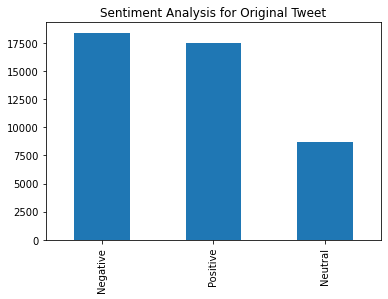

In [43]:
#to visualize the textblob
text_blob.TextBlob_label_originalTweet.value_counts().plot(kind='bar',title="Sentiment Analysis for Original Tweet")

<AxesSubplot:title={'center':'Sentiment Analysis for Cleaned Tweet'}>

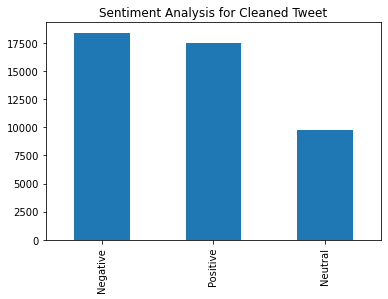

In [33]:
#to visualize the textblob
text_blob.TextBlob_label_cleanedTweet.value_counts().plot(kind='bar',title="Sentiment Analysis for Cleaned Tweet")

In [34]:
#VADER 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def getCompound(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    result = sentiment_dict['compound']
    return result

In [35]:
def getLabel2(compoundScore):
    if compoundScore >= 0.05 :
        return 'Positive'
    elif compoundScore <= - 0.05 :
        return 'Negative'
    else :
        return 'Neutral'

In [36]:
vader = clean_data.copy(deep=True)

vader['Vader_polarity_originalTweet'] = vader['original_tweet'].apply(getCompound)
vader.head()

,original_tweet,cleaned_tweet,Vader_polarity_originalTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.0000
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,-0.4137
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,-0.4183
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.0258


In [37]:
vader['Vader_polarity_cleanedTweet'] = vader['cleaned_tweet'].apply(getCompound)
vader.head()

,original_tweet,cleaned_tweet,Vader_polarity_originalTweet,Vader_polarity_cleanedTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,0.0000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.0000,0.0000
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,-0.4137,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,-0.4183,0.6488
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.0258,0.2732


In [38]:
vader['Vader_label_originalTweet'] = vader['Vader_polarity_originalTweet'].apply(getLabel2)
vader.head()

,original_tweet,cleaned_tweet,Vader_polarity_originalTweet,Vader_polarity_cleanedTweet,Vader_label_originalTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,0.0000,0.0000,Neutral
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.0000,0.0000,Neutral
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,-0.4137,-0.3400,Negative
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,-0.4183,0.6488,Negative
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.0258,0.2732,Neutral


In [39]:
vader['Vader_label_cleanedTweet'] = vader['Vader_polarity_cleanedTweet'].apply(getLabel2)
vader.head()

,original_tweet,cleaned_tweet,Vader_polarity_originalTweet,Vader_polarity_cleanedTweet,Vader_label_originalTweet,Vader_label_cleanedTweet
0,"In other words #katandandre, your food was crapilicious! #mkr",word katandandre food crapilicious,0.0000,0.0000,Neutral,Neutral
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten,0.0000,0.0000,Neutral,Neutral
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake,-0.4137,-0.3400,Negative,Negative
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head not concern another angry dude twitter,-0.4183,0.6488,Negative,Positive
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretend kurdish account like islam lie,0.0258,0.2732,Neutral,Positive


In [40]:
#csv to compare the polarity of original tweet and cleaned tweet
vader.to_csv('comparison_ori_clean_polarity_vader.csv')

<AxesSubplot:title={'center':'Sentiment Analysis for Original Tweet'}>

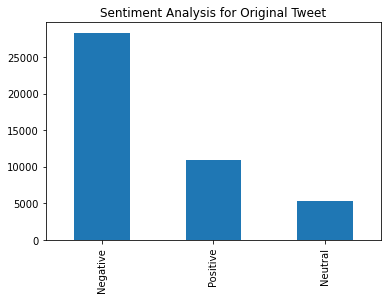

In [44]:
#to visualize the vader
vader.Vader_label_originalTweet.value_counts().plot(kind='bar',title="Sentiment Analysis for Original Tweet")

<AxesSubplot:title={'center':'Sentiment Analysis for Cleaned Tweet'}>

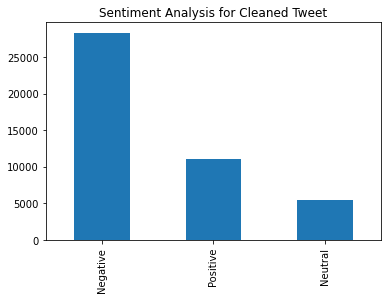

In [42]:
#to visualize the vader
vader.Vader_label_cleanedTweet.value_counts().plot(kind='bar',title="Sentiment Analysis for Cleaned Tweet")